In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_data_backup = pd.read_csv('/kaggle/input/my-dataset/credit_train.csv')
real_data_backup = pd.read_csv('/kaggle/input/my-dataset/credit_test.csv')

train_data = train_data_backup.copy()
real_data = real_data_backup.copy()

In [2]:
train_data.columns = train_data.columns.str.lower()
train_data.columns = train_data.columns.str.replace(' ','_')
train_data.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
#loan_status 1 = good ; 0 = bad
train_data['loan_status_int'] = np.where(train_data['loan_status'] == 'Fully Paid', 1, np.where(train_data['loan_status'] == 'Charged Off',0, np.nan))

#year in current job -> numeric
train_data['years_in_current_job_int'] = train_data['years_in_current_job'].str.replace('\+ years', '')
train_data['years_in_current_job_int'] = train_data['years_in_current_job_int'].str.replace(' years', '')
train_data['years_in_current_job_int'] = train_data['years_in_current_job_int'].str.replace(' year', '')
train_data['years_in_current_job_int'] = train_data['years_in_current_job_int'].str.replace('< 1', '0')
train_data['years_in_current_job_int'] = pd.to_numeric(train_data['years_in_current_job_int'])

train_data['years_in_current_job:0-2'] = np.where(train_data['years_in_current_job_int'].isin(range(0,2)), 1, 0)
train_data['years_in_current_job:3-5'] = np.where(train_data['years_in_current_job_int'].isin(range(3,5)), 1, 0)
train_data['years_in_current_job:6-8'] = np.where(train_data['years_in_current_job_int'].isin(range(6,8)), 1, 0)
train_data['years_in_current_job:>9'] = np.where(train_data['years_in_current_job_int'] >= 9, 1, 0)

#credit score - null values = average of credit scores
train_data['credit_score'] = np.where(train_data['credit_score'] > 900, train_data['credit_score'].values/10,train_data['credit_score'])
#train_data['credit_score'].fillna(train_data['credit_score'].mean(), inplace = True)
train_data['credit_score:<500'] = np.where(train_data['credit_score'] < 500, 1, 0)
train_data['credit_score:500-650'] = np.where(train_data['credit_score'].isin(range(500,650)), 1, 0)
train_data['credit_score:650-750'] = np.where(train_data['credit_score'].isin(range(651,750)), 1, 0)
train_data['credit_score:750-850'] = np.where(train_data['credit_score'].isin(range(750,850)), 1, 0)
train_data['credit_score:850-900'] = np.where(train_data['credit_score'].isin(range(851,900)), 1, 0)
train_data['credit_score:>900'] = np.where(train_data['credit_score'] > 900, None, 0)
train_data['credit_score:Missing'] = np.where(train_data['credit_score'].isnull(), 1, 0)

#months since last deliquent - Categories: Missing, 0-3, 4-30, 31-56, >=57
#train_data['months_since_last_delinquent:Missing'] = np.where(train_data['months_since_last_delinquent'].isnull(), 1, 0)
train_data['months_since_last_delinquent'].fillna(0, inplace = True)
train_data['months_since_last_delinquent:0-3'] = np.where(train_data['months_since_last_delinquent'].isin(range(0,3)), 1, 0)
train_data['months_since_last_delinquent:4-30'] = np.where(train_data['months_since_last_delinquent'].isin(range(4,30)), 1, 0)
train_data['months_since_last_delinquent:31-56'] = np.where(train_data['months_since_last_delinquent'].isin(range(31,56)), 1, 0)
train_data['months_since_last_delinquent:>=57'] = np.where(train_data['months_since_last_delinquent'] >= 57, 1, 0)

#current_loan_amount
train_data['current_loan_amount:0-182K'] = np.where(train_data['current_loan_amount'].isin(range(0,182000)),1,0)
train_data['current_loan_amount:182K-312K'] = np.where(train_data['current_loan_amount'].isin(range(182001,312000)),1,0)
train_data['current_loan_amount:312K-524K'] = np.where(train_data['current_loan_amount'].isin(range(312001,524000)),1,0)
train_data['current_loan_amount:>524K'] = np.where(train_data['current_loan_amount'] > 524000,1,0)

#monthly_debt
train_data['monthly_debt:0-10000'] = np.where(train_data['monthly_debt'].isin(range(0,10000)),1,0)
train_data['monthly_debt:10001-160000'] = np.where(train_data['monthly_debt'].isin(range(10001,16000)),1,0)
train_data['monthly_debt:160001-240000'] = np.where(train_data['monthly_debt'].isin(range(16001,24000)),1,0)
train_data['monthly_debt:>240000'] = np.where(train_data['monthly_debt'] > 24000,1,0)

#years_of_credit_history
train_data['years_of_credit_history:0-10'] = np.where(train_data['years_of_credit_history'].isin(range(0,10)),1,0)
train_data['years_of_credit_history:11-20'] = np.where(train_data['years_of_credit_history'].isin(range(11,20)),1,0)
train_data['years_of_credit_history:>20'] = np.where(train_data['years_of_credit_history'] > 20,1,0)

#number_of_open_accounts
train_data['number_of_open_accounts:0-5'] = np.where(train_data['number_of_open_accounts'].isin(range(0,5)),1,0)
train_data['number_of_open_accounts:6-10'] = np.where(train_data['number_of_open_accounts'].isin(range(6,10)),1,0)
train_data['number_of_open_accounts:>10'] = np.where(train_data['number_of_open_accounts'] > 10,1,0)

#number_of_credit_problems
train_data['number_of_credit_problems:0-5'] = np.where(train_data['number_of_credit_problems'].isin(range(0,5)),1,0)
train_data['number_of_credit_problems:6-10'] = np.where(train_data['number_of_credit_problems'].isin(range(6,10)),1,0)
train_data['number_of_credit_problems:>10'] = np.where(train_data['number_of_credit_problems'] > 10,1,0)

#current_credit_balance
train_data['current_credit_balance:0-115K'] = np.where(train_data['current_credit_balance'].isin(range(0,115000)),1,0)
train_data['current_credit_balance:115K-215K'] = np.where(train_data['current_credit_balance'].isin(range(115001,215000)),1,0)
train_data['current_credit_balance:215K-370K'] = np.where(train_data['current_credit_balance'].isin(range(215001,370000)),1,0)
train_data['current_credit_balance:>370K'] = np.where(train_data['current_credit_balance'] > 370000,1,0)

#maximum_open_credit
train_data['maximum_open_credit:0-283K'] = np.where(train_data['maximum_open_credit'].isin(range(0,283000)),1,0)
train_data['maximum_open_credit:283K-482K'] = np.where(train_data['maximum_open_credit'].isin(range(283001,482000)),1,0)
train_data['maximum_open_credit:482K-803K'] = np.where(train_data['maximum_open_credit'].isin(range(482001,803000)),1,0)
train_data['maximum_open_credit:>803K'] = np.where(train_data['maximum_open_credit'] > 803000,1,0)

#tax_liens
train_data['tax_liens:0-5'] = np.where(train_data['tax_liens'].isin(range(0,5)), 1, 0)
train_data['tax_liens:6-10'] = np.where(train_data['tax_liens'].isin(range(6,10)), 1, 0)
train_data['tax_liens:>10'] = np.where(train_data['tax_liens'] > 10, 1, 0)

#bankrupcies - null values = 0
train_data['bankruptcies'].fillna(0,inplace = True)
train_data['bankruptcies:0-3'] = np.where(train_data['bankruptcies'].isin(range(0,3)), 1, 0)
train_data['bankruptcies:>3'] = np.where(train_data['bankruptcies'] > 3, 1, 0)

#annual income - null values = mean
train_data['annual_income'].fillna(train_data['annual_income'].mean(), inplace = True)

# remove duplicates
#train_data = train_data.drop_duplicates(subset=['loan_id'])



/tmp/ipykernel_20/2108115779.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['years_in_current_job_int'] = train_data['years_in_current_job'].str.replace('\+ years', '')


In [4]:
train_data.isnull().sum()


loan_id                514
customer_id            514
loan_status            514
current_loan_amount    514
term                   514
                      ... 
tax_liens:0-5            0
tax_liens:6-10           0
tax_liens:>10            0
bankruptcies:0-3         0
bankruptcies:>3          0
Length: 66, dtype: int64

In [5]:
train_data = train_data.dropna(subset=['years_in_current_job_int'])
train_data = train_data.dropna(subset=['maximum_open_credit'])
train_data = train_data.dropna(subset=['tax_liens'])


In [6]:
train_data.isnull().sum()

loan_id                0
customer_id            0
loan_status            0
current_loan_amount    0
term                   0
                      ..
tax_liens:0-5          0
tax_liens:6-10         0
tax_liens:>10          0
bankruptcies:0-3       0
bankruptcies:>3        0
Length: 66, dtype: int64

In [7]:
train_data.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,...,current_credit_balance:>370K,maximum_open_credit:0-283K,maximum_open_credit:283K-482K,maximum_open_credit:482K-803K,maximum_open_credit:>803K,tax_liens:0-5,tax_liens:6-10,tax_liens:>10,bankruptcies:0-3,bankruptcies:>3
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1.167493e+06,8 years,Home Mortgage,Home Improvements,...,0,0,1,0,0,1,0,0,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,...,0,0,0,0,1,1,0,0,1,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2.231892e+06,8 years,Own Home,Debt Consolidation,...,0,0,0,1,0,1,0,0,1,0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,8.069490e+05,3 years,Own Home,Debt Consolidation,...,0,0,1,0,0,1,0,0,1,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,1.378277e+06,5 years,Rent,Debt Consolidation,...,0,0,1,0,0,1,0,0,1,0


In [8]:
pd.set_option('display.float_format', '{:f}'.format)
train_data.describe()

,current_loan_amount,credit_score,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,...,current_credit_balance:>370K,maximum_open_credit:0-283K,maximum_open_credit:283K-482K,maximum_open_credit:482K-803K,maximum_open_credit:>803K,tax_liens:0-5,tax_liens:6-10,tax_liens:>10,bankruptcies:0-3,bankruptcies:>3
count,95766.000000,77427.000000,95766.000000,95766.000000,95766.000000,95766.000000,95766.000000,95766.000000,95766.000000,95766.000000,...,95766.000000,95766.000000,95766.000000,95766.000000,95766.000000,95766.000000,95766.000000,95766.000000,95766.000000,95766.000000
mean,11822942.970021,716.278430,1395104.237203,18703.947220,17.999999,16.311655,11.182654,0.162323,296934.402429,761178.259132,...,0.250987,0.259633,0.251551,0.247823,0.240983,0.999593,0.000219,0.000031,0.998778,0.000313
std,31854730.010572,28.340862,984569.182952,12231.317046,6.804158,22.991146,5.020269,0.474348,378267.701967,8499718.953070,...,0.433583,0.438435,0.433907,0.431751,0.427682,0.020176,0.014807,0.005597,0.034932,0.017697
min,10802.000000,585.000000,76627.000000,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183705.500000,703.000000,942970.000000,10442.875000,13.400000,0.000000,8.000000,0.000000,114247.000000,276221.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,316954.000000,722.000000,1378276.559842,16435.475000,16.800000,0.000000,10.000000,0.000000,212078.000000,471251.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,528836.000000,739.000000,1530559.250000,24255.210000,21.500000,29.000000,14.000000,0.000000,370956.000000,786912.500000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,99999999.000000,751.000000,165557393.000000,435843.280000,70.500000,176.000000,76.000000,15.000000,32878968.000000,1539737892.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
loan_data_dummies = [   pd.get_dummies(train_data['term'], prefix = 'term', prefix_sep=':').astype(int),
                        pd.get_dummies(train_data['home_ownership'], prefix ='home_ownership', prefix_sep=':').astype(int),
                        pd.get_dummies(train_data['purpose'], prefix ='purpose', prefix_sep=':').astype(int)
                    ]
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
loan_data_dummies

,term:Long Term,term:Short Term,home_ownership:HaveMortgage,home_ownership:Home Mortgage,home_ownership:Own Home,home_ownership:Rent,purpose:Business Loan,purpose:Buy House,purpose:Buy a Car,purpose:Debt Consolidation,...,purpose:Medical Bills,purpose:Other,purpose:Take a Trip,purpose:major_purchase,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
99995,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99996,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
99997,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [11]:
train_data = pd.concat([train_data, loan_data_dummies], axis = 1)
train_data.columns.values

array(['loan_id', 'customer_id', 'loan_status', 'current_loan_amount',
       'term', 'credit_score', 'annual_income', 'years_in_current_job',
       'home_ownership', 'purpose', 'monthly_debt',
       'years_of_credit_history', 'months_since_last_delinquent',
       'number_of_open_accounts', 'number_of_credit_problems',
       'current_credit_balance', 'maximum_open_credit', 'bankruptcies',
       'tax_liens', 'loan_status_int', 'years_in_current_job_int',
       'years_in_current_job:0-2', 'years_in_current_job:3-5',
       'years_in_current_job:6-8', 'years_in_current_job:>9',
       'credit_score:<500', 'credit_score:500-650',
       'credit_score:650-750', 'credit_score:750-850',
       'credit_score:850-900', 'credit_score:>900',
       'credit_score:Missing', 'months_since_last_delinquent:0-3',
       'months_since_last_delinquent:4-30',
       'months_since_last_delinquent:31-56',
       'months_since_last_delinquent:>=57', 'current_loan_amount:0-182K',
       'current_loan_am

In [12]:
train_data_cat_x = train_data.loc [:,['years_in_current_job:0-2', 'years_in_current_job:3-5', 'years_in_current_job:6-8', 'years_in_current_job:>9',
       'credit_score:<500', 'credit_score:500-650', 'credit_score:650-750', 'credit_score:750-850', 'credit_score:850-900', 'credit_score:>900', 'credit_score:Missing',
       'months_since_last_delinquent:0-3', 'months_since_last_delinquent:4-30', 'months_since_last_delinquent:31-56', 'months_since_last_delinquent:>=57',
       'current_loan_amount:0-182K', 'current_loan_amount:182K-312K', 'current_loan_amount:312K-524K', 'current_loan_amount:>524K',
       'monthly_debt:0-10000', 'monthly_debt:10001-160000', 'monthly_debt:160001-240000', 'monthly_debt:>240000',
       'years_of_credit_history:0-10', 'years_of_credit_history:11-20', 'years_of_credit_history:>20',
       'number_of_open_accounts:0-5', 'number_of_open_accounts:6-10', 'number_of_open_accounts:>10',
       'number_of_credit_problems:0-5', 'number_of_credit_problems:6-10', 'number_of_credit_problems:>10',
       'current_credit_balance:0-115K', 'current_credit_balance:115K-215K', 'current_credit_balance:215K-370K', 'current_credit_balance:>370K',
       'maximum_open_credit:0-283K', 'maximum_open_credit:283K-482K', 'maximum_open_credit:482K-803K', 'maximum_open_credit:>803K',
       'tax_liens:0-5', 'tax_liens:6-10', 'tax_liens:>10',
       'bankruptcies:0-3', 'bankruptcies:>3',
       'term:Long Term', 'term:Short Term',
       'home_ownership:HaveMortgage', 'home_ownership:Home Mortgage', 'home_ownership:Own Home', 'home_ownership:Rent', 'purpose:Business Loan',
       'purpose:Buy House', 'purpose:Buy a Car', 'purpose:Debt Consolidation', 'purpose:Educational Expenses', 'purpose:Home Improvements', 'purpose:Medical Bills', 'purpose:Other', 'purpose:Take a Trip',
       'purpose:major_purchase', 'purpose:moving', 'purpose:other', 'purpose:renewable_energy', 'purpose:small_business', 'purpose:vacation', 'purpose:wedding'
]]
train_data_y =  train_data.loc [:,'loan_status_int']

In [13]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_data_y, test_data_y = train_test_split(train_data_cat_x, train_data_y, test_size = 0.2, random_state = 42)

In [14]:
train_data.shape

(76612, 67)

In [15]:
test_data.shape

(19154, 67)

In [16]:
train_data_y.shape

(76612,)

In [17]:
test_data_y.shape

(19154,)

In [18]:
ref_categories = [
    'years_in_current_job:0-2',
    'credit_score:<500',
    'credit_score:850-900',
    'credit_score:>900',
    'months_since_last_delinquent:0-3',
    'current_loan_amount:0-182K',
    'monthly_debt:0-10000',
    'years_of_credit_history:0-10',
    'number_of_open_accounts:0-5',
    'number_of_credit_problems:0-5',
    'current_credit_balance:0-115K',
    'maximum_open_credit:0-283K',
    'tax_liens:0-5',
    'bankruptcies:0-3',
    'term:Short Term',
    'home_ownership:Home Mortgage',
    'purpose:Debt Consolidation'
    ]

In [19]:
train_data_x = train_data.drop(ref_categories, axis = 1)
train_data_x.shape

(76612, 50)

In [20]:
X = train_data_x
corr_matrix = X.corr()
print(corr_matrix)

                                    years_in_current_job:3-5  \
years_in_current_job:3-5                            1.000000   
years_in_current_job:6-8                           -0.153547   
years_in_current_job:>9                            -0.318757   
credit_score:500-650                               -0.006394   
credit_score:650-750                                0.000237   
credit_score:750-850                               -0.006561   
credit_score:Missing                                0.004402   
months_since_last_delinquent:4-30                  -0.020315   
months_since_last_delinquent:31-56                  0.013520   
months_since_last_delinquent:>=57                  -0.002982   
current_loan_amount:182K-312K                       0.015583   
current_loan_amount:312K-524K                      -0.023904   
current_loan_amount:>524K                          -0.020899   
monthly_debt:10001-160000                           0.002646   
monthly_debt:160001-240000              

In [21]:
#A VIF value greater than 5 or 10 indicates that the variable is highly correlated with other independent variables and might need to be removed from the model.
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = train_data_x

# For each column in X, calculate its VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF for each feature
print(vif_data)

                               feature       VIF
0             years_in_current_job:3-5  1.409658
1             years_in_current_job:6-8  1.331631
2              years_in_current_job:>9  2.136102
3                 credit_score:500-650  1.539364
4                 credit_score:650-750 12.592320
5                 credit_score:750-850  1.333872
6                 credit_score:Missing  3.838091
7    months_since_last_delinquent:4-30  1.437459
8   months_since_last_delinquent:31-56  1.286961
9    months_since_last_delinquent:>=57  1.190093
10       current_loan_amount:182K-312K  2.171212
11       current_loan_amount:312K-524K  2.581340
12           current_loan_amount:>524K  2.635989
13           monthly_debt:10001-160000  1.004246
14          monthly_debt:160001-240000  1.005335
15                monthly_debt:>240000  1.759530
16       years_of_credit_history:11-20  1.165034
17         years_of_credit_history:>20  1.701007
18        number_of_open_accounts:6-10  2.809149
19         number_of

In [22]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [23]:
reg = LogisticRegression_with_p_values()
reg.fit(train_data_x, train_data_y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
feature_name = train_data_x.columns.values
summary_table = pd.DataFrame(columns = ['Feature'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table
summary_table.to_csv('summary_table.csv', index=False)

In [25]:
#remove tax_liens, bankruptcies, number_of_credit_problems
ref_categories_2 = [
    'years_in_current_job:0-2',
    'credit_score:<500',
    'credit_score:850-900',
    'credit_score:>900',
    'months_since_last_delinquent:0-3',
    'current_loan_amount:0-182K',
    'monthly_debt:0-10000',
    'years_of_credit_history:0-10',
    'number_of_open_accounts:0-5',
    #'number_of_credit_problems:0-5',
    'current_credit_balance:0-115K',
    'maximum_open_credit:0-283K',
    #'tax_liens:0-5',
    #'bankruptcies:0-3',
    'term:Short Term',
    'home_ownership:Home Mortgage',
    'purpose:Debt Consolidation',
    
    #removed independent variables list
    'tax_liens:0-5',
    'tax_liens:6-10',
    'tax_liens:>10',
    'bankruptcies:0-3',
    'bankruptcies:>3',
    'number_of_credit_problems:0-5',
    'number_of_credit_problems:6-10',
    'number_of_credit_problems:>10'
    ]

In [26]:
train_data_x = train_data.drop(ref_categories_2, axis = 1)
train_data_x.shape

(76612, 45)

In [27]:
reg = LogisticRegression_with_p_values()
reg.fit(train_data_x, train_data_y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
feature_name = train_data_x.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.556862,NaN
1,years_in_current_job:3-5,0.060891,0.026636
2,years_in_current_job:6-8,-0.031738,0.282580
3,years_in_current_job:>9,-0.006019,0.779057
4,credit_score:500-650,-0.398859,0.000000
5,credit_score:650-750,0.006500,0.857927
6,credit_score:750-850,0.969628,0.000000
7,credit_score:Missing,-0.345411,0.000000
8,months_since_last_delinquent:4-30,0.035988,0.123203
9,months_since_last_delinquent:31-56,0.095440,0.000394


In [29]:
import pickle
pickle.dump(reg, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

In [30]:
test_data_x = test_data.drop(ref_categories_2, axis = 1)

In [31]:
y_hat_test = reg.model.predict(test_data_x)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [32]:
y_hat_test

array([1., 1., 1., ..., 1., 1., 1.])

In [33]:
y_hat_test_proba = reg.model.predict_proba(test_data_x)

In [34]:
y_hat_test_proba

array([[0.22738036, 0.77261964],
       [0.20890307, 0.79109693],
       [0.22512256, 0.77487744],
       ...,
       [0.09983644, 0.90016356],
       [0.10952866, 0.89047134],
       [0.25657438, 0.74342562]])

In [35]:
y_hat_test_proba[:][:,1]

array([0.77261964, 0.79109693, 0.77487744, ..., 0.90016356, 0.89047134,
       0.74342562])

In [36]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [37]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([0.77261964, 0.79109693, 0.77487744, ..., 0.90016356, 0.89047134,
       0.74342562])

In [38]:
test_data_y_temp = test_data_y
test_data_y_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs = pd.concat([test_data_y_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [39]:
df_actual_predicted_probs.shape

(19154, 2)

In [40]:
df_actual_predicted_probs.columns = ['test_data_y', 'y_hat_test_proba']
df_actual_predicted_probs.index = test_data_y.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [41]:
df_actual_predicted_probs

,test_data_y,y_hat_test_proba
0,0.000000,0.772620
1,0.000000,0.791097
2,1.000000,0.774877
3,1.000000,0.623899
4,0.000000,0.777175
...,...,...
19149,0.000000,0.796359
19150,1.000000,0.850431
19151,1.000000,0.900164
19152,1.000000,0.890471


In [42]:
tr = 0.75 #cut-off threshold
# We create a new column with an indicator - where every observation that has predicted probability greater than the threshold has a value of 1, and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [43]:
pd.crosstab(df_actual_predicted_probs['test_data_y'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Confusion Matrix

Predicted,0,1
Actual,,
0.000000,1950,2390
1.000000,4220,10594


In [44]:
pd.crosstab(df_actual_predicted_probs['test_data_y'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Confusion Matrix - percentages

Predicted,0,1
Actual,,
0.000000,0.101806,0.124778
1.000000,0.220320,0.553096


In [45]:
(pd.crosstab(df_actual_predicted_probs['test_data_y'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['test_data_y'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Accuracy of the model = sum of the diagonal percentages

0.6549023702620863

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_curve(df_actual_predicted_probs['test_data_y'], df_actual_predicted_probs['y_hat_test_proba'])
#fpr #tpr #thresholds

(array([0.        , 0.        , 0.        , ..., 0.99884793, 0.99884793,
        1.        ]),
 array([0.00000000e+00, 6.75037127e-05, 2.97016336e-03, ...,
        9.99932496e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.9834738 , 0.9834738 , 0.9698864 , ..., 0.41273467, 0.3974651 ,
        0.33621811]))

In [47]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['test_data_y'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

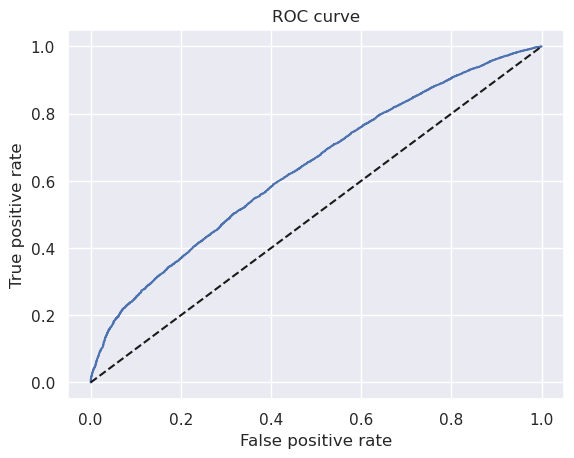

In [48]:
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [49]:
AUROC = roc_auc_score(df_actual_predicted_probs['test_data_y'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC #64% -> Poor 

0.6365921528333827

In [50]:
#Gini coefficient
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['test_data_y'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['test_data_y'].cumsum()
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['test_data_y'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['test_data_y'].sum())
df_actual_predicted_probs.head()

,index,test_data_y,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,7623,0.000000,0.336218,0,1,0.000000,1.000000,0.000052,0.000000,0.000230
1,12064,0.000000,0.338398,0,2,0.000000,2.000000,0.000104,0.000000,0.000461
2,14991,0.000000,0.355888,0,3,0.000000,3.000000,0.000157,0.000000,0.000691
3,10361,0.000000,0.386890,0,4,0.000000,4.000000,0.000209,0.000000,0.000922
4,15030,0.000000,0.397319,0,5,0.000000,5.000000,0.000261,0.000000,0.001152


Text(0.5, 1.0, 'Gini')

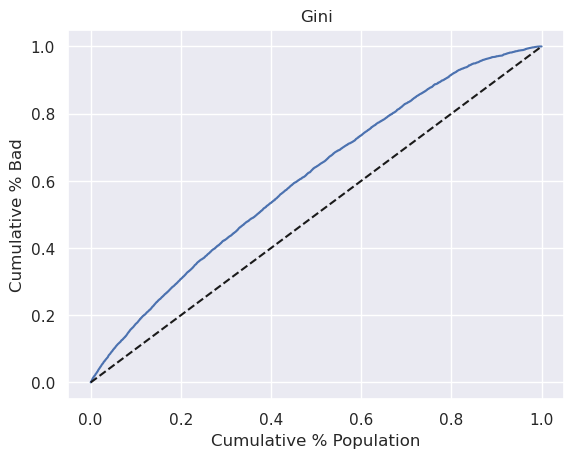

In [51]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [52]:
# Calculate Gini from AUROC.
Gini = AUROC * 2 - 1
Gini

0.2731843056667653

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

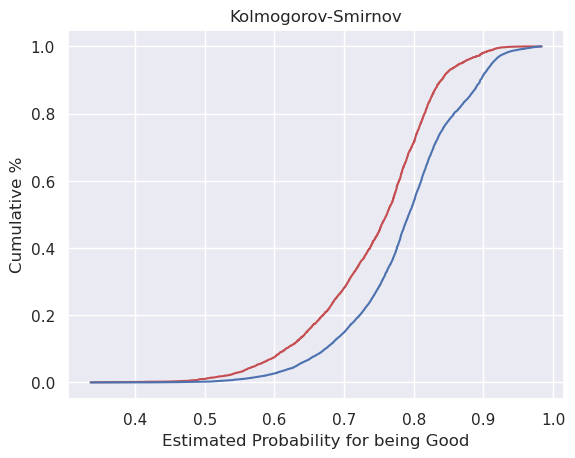

In [53]:
#Kolmogorov-Smirnov coefficient
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [54]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.185374931796364

In [55]:
real_data.columns = real_data.columns.str.lower()
real_data.columns = real_data.columns.str.replace(' ','_')
#year in current job -> numeric
real_data['years_in_current_job_int'] = real_data['years_in_current_job'].str.replace('\+ years', '')
real_data['years_in_current_job_int'] = real_data['years_in_current_job_int'].str.replace(' years', '')
real_data['years_in_current_job_int'] = real_data['years_in_current_job_int'].str.replace(' year', '')
real_data['years_in_current_job_int'] = real_data['years_in_current_job_int'].str.replace('< 1', '0')
real_data['years_in_current_job_int'] = pd.to_numeric(real_data['years_in_current_job_int'])

real_data['years_in_current_job:0-2'] = np.where(real_data['years_in_current_job_int'].isin(range(0,2)), 1, 0)
real_data['years_in_current_job:3-5'] = np.where(real_data['years_in_current_job_int'].isin(range(3,5)), 1, 0)
real_data['years_in_current_job:6-8'] = np.where(real_data['years_in_current_job_int'].isin(range(6,8)), 1, 0)
real_data['years_in_current_job:>9'] = np.where(real_data['years_in_current_job_int'] >= 9, 1, 0)

#credit score - null values = average of credit scores
real_data['credit_score'] = np.where(real_data['credit_score'] > 900, real_data['credit_score'].values/10,real_data['credit_score'])
#real_data['credit_score'].fillna(real_data['credit_score'].mean(), inplace = True)
real_data['credit_score:<500'] = np.where(real_data['credit_score'] < 500, 1, 0)
real_data['credit_score:500-650'] = np.where(real_data['credit_score'].isin(range(500,650)), 1, 0)
real_data['credit_score:650-750'] = np.where(real_data['credit_score'].isin(range(651,750)), 1, 0)
real_data['credit_score:750-850'] = np.where(real_data['credit_score'].isin(range(750,850)), 1, 0)
real_data['credit_score:850-900'] = np.where(real_data['credit_score'].isin(range(851,900)), 1, 0)
real_data['credit_score:>900'] = np.where(real_data['credit_score'] > 900, None, 0)
real_data['credit_score:Missing'] = np.where(real_data['credit_score'].isnull(), 1, 0)

#months since last deliquent - Categories: Missing, 0-3, 4-30, 31-56, >=57
#real_data['months_since_last_delinquent:Missing'] = np.where(real_data['months_since_last_delinquent'].isnull(), 1, 0)
real_data['months_since_last_delinquent'].fillna(0, inplace = True)
real_data['months_since_last_delinquent:0-3'] = np.where(real_data['months_since_last_delinquent'].isin(range(0,3)), 1, 0)
real_data['months_since_last_delinquent:4-30'] = np.where(real_data['months_since_last_delinquent'].isin(range(4,30)), 1, 0)
real_data['months_since_last_delinquent:31-56'] = np.where(real_data['months_since_last_delinquent'].isin(range(31,56)), 1, 0)
real_data['months_since_last_delinquent:>=57'] = np.where(real_data['months_since_last_delinquent'] >= 57, 1, 0)

#current_loan_amount
real_data['current_loan_amount:0-182K'] = np.where(real_data['current_loan_amount'].isin(range(0,182000)),1,0)
real_data['current_loan_amount:182K-312K'] = np.where(real_data['current_loan_amount'].isin(range(182001,312000)),1,0)
real_data['current_loan_amount:312K-524K'] = np.where(real_data['current_loan_amount'].isin(range(312001,524000)),1,0)
real_data['current_loan_amount:>524K'] = np.where(real_data['current_loan_amount'] > 524000,1,0)

#monthly_debt
real_data['monthly_debt:0-10000'] = np.where(real_data['monthly_debt'].isin(range(0,10000)),1,0)
real_data['monthly_debt:10001-160000'] = np.where(real_data['monthly_debt'].isin(range(10001,16000)),1,0)
real_data['monthly_debt:160001-240000'] = np.where(real_data['monthly_debt'].isin(range(16001,24000)),1,0)
real_data['monthly_debt:>240000'] = np.where(real_data['monthly_debt'] > 24000,1,0)

#years_of_credit_history
real_data['years_of_credit_history:0-10'] = np.where(real_data['years_of_credit_history'].isin(range(0,10)),1,0)
real_data['years_of_credit_history:11-20'] = np.where(real_data['years_of_credit_history'].isin(range(11,20)),1,0)
real_data['years_of_credit_history:>20'] = np.where(real_data['years_of_credit_history'] > 20,1,0)

#number_of_open_accounts
real_data['number_of_open_accounts:0-5'] = np.where(real_data['number_of_open_accounts'].isin(range(0,5)),1,0)
real_data['number_of_open_accounts:6-10'] = np.where(real_data['number_of_open_accounts'].isin(range(6,10)),1,0)
real_data['number_of_open_accounts:>10'] = np.where(real_data['number_of_open_accounts'] > 10,1,0)

#number_of_credit_problems
real_data['number_of_credit_problems:0-5'] = np.where(real_data['number_of_credit_problems'].isin(range(0,5)),1,0)
real_data['number_of_credit_problems:6-10'] = np.where(real_data['number_of_credit_problems'].isin(range(6,10)),1,0)
real_data['number_of_credit_problems:>10'] = np.where(real_data['number_of_credit_problems'] > 10,1,0)

#current_credit_balance
real_data['current_credit_balance:0-115K'] = np.where(real_data['current_credit_balance'].isin(range(0,115000)),1,0)
real_data['current_credit_balance:115K-215K'] = np.where(real_data['current_credit_balance'].isin(range(115001,215000)),1,0)
real_data['current_credit_balance:215K-370K'] = np.where(real_data['current_credit_balance'].isin(range(215001,370000)),1,0)
real_data['current_credit_balance:>370K'] = np.where(real_data['current_credit_balance'] > 370000,1,0)

#maximum_open_credit
real_data['maximum_open_credit:0-283K'] = np.where(real_data['maximum_open_credit'].isin(range(0,283000)),1,0)
real_data['maximum_open_credit:283K-482K'] = np.where(real_data['maximum_open_credit'].isin(range(283001,482000)),1,0)
real_data['maximum_open_credit:482K-803K'] = np.where(real_data['maximum_open_credit'].isin(range(482001,803000)),1,0)
real_data['maximum_open_credit:>803K'] = np.where(real_data['maximum_open_credit'] > 803000,1,0)

#tax_liens
real_data['tax_liens:0-5'] = np.where(real_data['tax_liens'].isin(range(0,5)), 1, 0)
real_data['tax_liens:6-10'] = np.where(real_data['tax_liens'].isin(range(6,10)), 1, 0)
real_data['tax_liens:>10'] = np.where(real_data['tax_liens'] > 10, 1, 0)

#bankrupcies - null values = 0
real_data['bankruptcies'].fillna(0,inplace = True)
real_data['bankruptcies:0-3'] = np.where(real_data['bankruptcies'].isin(range(0,3)), 1, 0)
real_data['bankruptcies:>3'] = np.where(real_data['bankruptcies'] > 3, 1, 0)

#annual income - null values = mean
real_data['annual_income'].fillna(real_data['annual_income'].mean(), inplace = True)
real_data = real_data.dropna(subset=['years_in_current_job_int'])
real_data = real_data.dropna(subset=['maximum_open_credit'])
real_data = real_data.dropna(subset=['tax_liens'])
loan_data_dummies2 = [   pd.get_dummies(real_data['term'], prefix = 'term', prefix_sep=':').astype(int),
                        pd.get_dummies(real_data['home_ownership'], prefix ='home_ownership', prefix_sep=':').astype(int),
                        pd.get_dummies(real_data['purpose'], prefix ='purpose', prefix_sep=':').astype(int)
                    ]
loan_data_dummies2 = pd.concat(loan_data_dummies2, axis = 1)
real_data = pd.concat([real_data, loan_data_dummies2], axis = 1)
real_data_cat_x = real_data.loc [:,['years_in_current_job:0-2', 'years_in_current_job:3-5', 'years_in_current_job:6-8', 'years_in_current_job:>9',
       'credit_score:<500', 'credit_score:500-650', 'credit_score:650-750', 'credit_score:750-850', 'credit_score:850-900', 'credit_score:>900', 'credit_score:Missing',
       'months_since_last_delinquent:0-3', 'months_since_last_delinquent:4-30', 'months_since_last_delinquent:31-56', 'months_since_last_delinquent:>=57',
       'current_loan_amount:0-182K', 'current_loan_amount:182K-312K', 'current_loan_amount:312K-524K', 'current_loan_amount:>524K',
       'monthly_debt:0-10000', 'monthly_debt:10001-160000', 'monthly_debt:160001-240000', 'monthly_debt:>240000',
       'years_of_credit_history:0-10', 'years_of_credit_history:11-20', 'years_of_credit_history:>20',
       'number_of_open_accounts:0-5', 'number_of_open_accounts:6-10', 'number_of_open_accounts:>10',
       'number_of_credit_problems:0-5', 'number_of_credit_problems:6-10', 'number_of_credit_problems:>10',
       'current_credit_balance:0-115K', 'current_credit_balance:115K-215K', 'current_credit_balance:215K-370K', 'current_credit_balance:>370K',
       'maximum_open_credit:0-283K', 'maximum_open_credit:283K-482K', 'maximum_open_credit:482K-803K', 'maximum_open_credit:>803K',
       'tax_liens:0-5', 'tax_liens:6-10', 'tax_liens:>10',
       'bankruptcies:0-3', 'bankruptcies:>3',
       'term:Long Term', 'term:Short Term',
       'home_ownership:HaveMortgage', 'home_ownership:Home Mortgage', 'home_ownership:Own Home', 'home_ownership:Rent', 'purpose:Business Loan',
       'purpose:Buy House', 'purpose:Buy a Car', 'purpose:Debt Consolidation', 'purpose:Educational Expenses', 'purpose:Home Improvements', 'purpose:Medical Bills', 'purpose:Other', 'purpose:Take a Trip',
       'purpose:major_purchase', 'purpose:moving', 'purpose:other', 'purpose:renewable_energy', 'purpose:small_business', 'purpose:vacation', 'purpose:wedding'
]]
real_data_x = real_data_cat_x.drop(ref_categories_2, axis = 1)

/tmp/ipykernel_20/2225514880.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  real_data['years_in_current_job_int'] = real_data['years_in_current_job'].str.replace('\+ years', '')


In [56]:
real_data_x.columns.values

array(['years_in_current_job:3-5', 'years_in_current_job:6-8',
       'years_in_current_job:>9', 'credit_score:500-650',
       'credit_score:650-750', 'credit_score:750-850',
       'credit_score:Missing', 'months_since_last_delinquent:4-30',
       'months_since_last_delinquent:31-56',
       'months_since_last_delinquent:>=57',
       'current_loan_amount:182K-312K', 'current_loan_amount:312K-524K',
       'current_loan_amount:>524K', 'monthly_debt:10001-160000',
       'monthly_debt:160001-240000', 'monthly_debt:>240000',
       'years_of_credit_history:11-20', 'years_of_credit_history:>20',
       'number_of_open_accounts:6-10', 'number_of_open_accounts:>10',
       'current_credit_balance:115K-215K',
       'current_credit_balance:215K-370K', 'current_credit_balance:>370K',
       'maximum_open_credit:283K-482K', 'maximum_open_credit:482K-803K',
       'maximum_open_credit:>803K', 'term:Long Term',
       'home_ownership:HaveMortgage', 'home_ownership:Own Home',
       'home_owne

In [57]:
real_data_x.head()

,years_in_current_job:3-5,years_in_current_job:6-8,years_in_current_job:>9,credit_score:500-650,credit_score:650-750,credit_score:750-850,credit_score:Missing,months_since_last_delinquent:4-30,months_since_last_delinquent:31-56,months_since_last_delinquent:>=57,...,purpose:Medical Bills,purpose:Other,purpose:Take a Trip,purpose:major_purchase,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y_hat_real = reg.model.predict(real_data_x)

In [59]:
y_hat_real_proba = reg.model.predict_proba(real_data_x)

In [60]:
real_data_2 = real_data.drop(real_data_cat_x, axis = 1)
real_data_2['proba_bad'] = y_hat_real_proba[:, 0]
real_data_2['proba_good'] = y_hat_real_proba[:, 1]
real_data_2.to_csv('test_data_output.csv', index=False)